# Lineare Regression Beispiel 2 - Advertising

Eine Firma hat einige Werbespots und Anzeigen für TV, Radio und Zeitung produziert. Um die Performance der Werbung zu steigern und Kosten zu minimieren, wirst du damit beauftragt eine möglichst effiziente Planung aufzustellen.

## Requirements

Dieses Beispiel entstammt dem begleitenden Lehrbuch [An Introduction to Statistical Learning](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf) und dem dazugehörigen Datensatz _Advertising.csv_. Diesen kannst du dir [hier](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) herunterladen.

Du solltest die Bibliotheken Pandas, Numpy, Seaborn, Matplotlib, ScikitLearn und Sympy installiert haben.

## Reminder

Jedes Projekt besteht aus folgenden Phasen:
1. Businessunderstanding und Fragestellung / Zielsetzung
2. Dateninput
3. Datenaufbereitung & Verständnis
4. Modellierung
5. Output

Ein besonderer Fokus in liegt auf der **Modellierung**. Denn diese unterteilt sich ebenfalls in einzelne Schritte:
1. Festlegen von Feature- und Zielvariablen
2. Erstellen eines Trainings und Testdatensatzes
3. Erstellung des Models
4. Bewertung des Models und ggf. Anpassungen

## Businessunderstanding

Wie einleitend bereits erwähnt wird Werbung geschaltet. Da diese Werbung Geld kostet und nicht jedes Medium gleichermaßen funktioniert, muss ermittelt werden welchem Medium welche Aufmerksamkeit gewipnet wird.

### Zielsetzung

Der Kunde möchte am Ende in der Lage sein folgende Fragestellungen beantworten to können:
1. Welche Sales werden bei einer beliebigen Konfiguration aus Werbeanzeigen in den gegebenen Medien erwartungsgemäß definiert?
2. Was ist die optimale Konfiguration aus Werbeanzeigen für Unterschiedliche Medien um mit einem minimalen Aufwand ein maximales Resultat zu erzielen?

## Datainput

Als Datenquelle wird die Datei `Advertising.csv` aus dem lokalen Verzeichnis `data` genutzt. Falls du die csv nicht verfügbar hast, kannst du sie [hier](http://faculty.marshall.usc.edu/gareth-james/ISL/data.html) herunterladen.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
# index_col=0 ist ein optionaler Parameter. Die CSV verfügt bereits über eine Nummerierung.
# um hier keine doppelte Nummerierung zu haben, wird der Index festgelegt.
# Das hat keine Auswirkung auf weiteres vorgehen.
# Du kannst index_col=0 mal entfernen und schauen wie es ohne aussieht.
advertising_df = pd.read_csv('data/Advertising.csv', index_col=0)
advertising_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Datenaufbereitung und Verständnis

In [3]:
# Gibt Dimension der Tabelle als Tupel an
# Anzahl der Reihen (exklusive header), Anzahl der Spalten (exclusive Indexspalte)

advertising_df.shape

(200, 4)

In [4]:
# Spaltenbezeichungen

advertising_df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
# Typisierung
# **WICHTIG** es ist eine initiale typisierung von Pandas und muss nicht immer stimmen

advertising_df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [6]:
# Nullwerte
# In diesem Datensatz sind keine Nullwerte vorhanden.
# Wäre etwas anderes der Fall, müsste überlegt werden, wie damit umgegangen wird.

for column in advertising_df.columns:
    none_values = advertising_df[str(column)].isna().sum()
    print(f"Nullwerte {column}: {none_values}")

Nullwerte TV: 0
Nullwerte radio: 0
Nullwerte newspaper: 0
Nullwerte sales: 0


In [7]:
print(f"Minimaler Sales Wert: {advertising_df['sales'].min()}")
print(f"Maximaler Sales Wert: {advertising_df['sales'].max()}")
print(f"Durchschnittlicher Sales Wert: {advertising_df['sales'].mean()}")

Minimaler Sales Wert: 1.6
Maximaler Sales Wert: 27.0
Durchschnittlicher Sales Wert: 14.0225


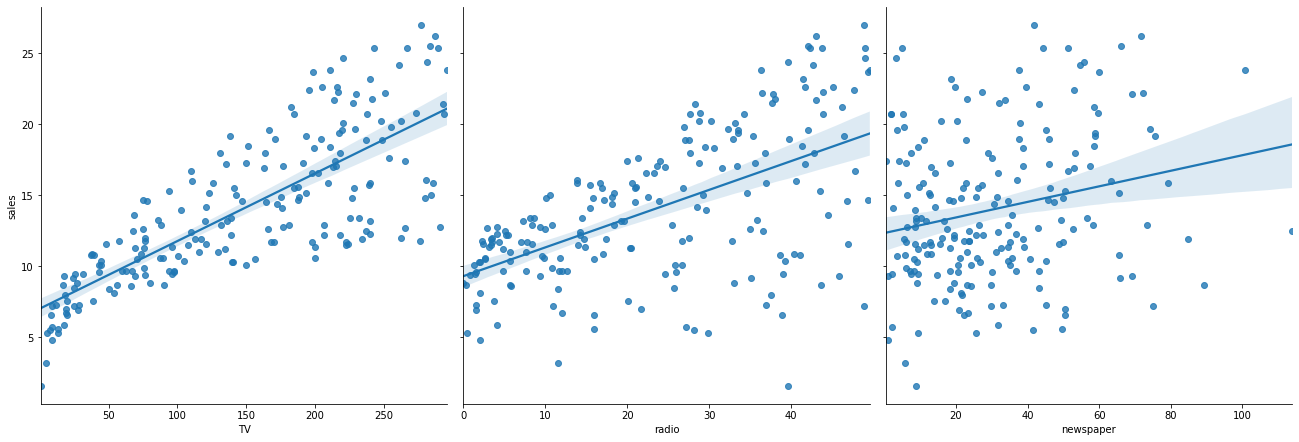

In [8]:
# Scatter-Regressionsplot
# es wird visuell deutlich welche Features sich zur Regression eignen

sns.pairplot(
    x_vars=['TV', 'radio', 'newspaper'],
    y_vars='sales',
    data=advertising_df,
    height=6,
    kind='reg'
)

In [9]:
# Korrelationskoeffizienten
# Hier wird die Korrelation mit zahlen beziffert

advertising_df.corr()['sales']

TV           0.782224
radio        0.576223
newspaper    0.228299
sales        1.000000
Name: sales, dtype: float64

### Folgerung

Im Sinne der linearen Regression wird eine starke Korrelation bevorzugt (je näher der Wert der 0, desto weniger korrelieren die Eigenschaften).

Im aktuellen Fall muss man hinterfragen, inwieweit die Spalte _Newspaper_ die lineare Regression verunreinigt, da der Regressionskoeffizient mit _0.22_ ziemlich gering ist. Im Sinne der Fragestellung macht es jedoch keinen Sinn eine Spalte von der Regressionsanalyse auszuschließen. Es müsste eher die Anwendung der Methode der linearen Regression generell hinterfragt werden.

## Modellierung

### Dataframe in Trainings und Testdaten splitten

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
feature_cols = ['TV', 'radio', 'newspaper']

In [12]:
X = advertising_df[feature_cols]

In [13]:
target_col = 'sales'

In [14]:
y = advertising_df[target_col]

In [15]:
# Default Split: 75% Training - 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Lineare Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Lineare Regression

regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Vorhersage der Testdaten

y_pred = regr.predict(X_test)

In [19]:
print('Mittlere quadratische Abweichung: %.2f' % mean_squared_error(y_test, y_pred))
print('Determinationskoeffizient (Bestimmtheitsmaß): %.2f' % r2_score(y_test, y_pred))

Mittlere quadratische Abweichung: 1.97
Determinationskoeffizient (Bestimmtheitsmaß): 0.92


#### Bewertung des Modells

Die Vorhersage hat eine mittlere quadratische Abweichung von _1.97_. Dies sollte man in relation des Wertebereichs der Zielvariablen legen. Diese liegt zwischen 1.6 und 27. Der durchschnittliche Wert liegt bei 14.0225 (dies wurde beim Kennenlernen des Datensatzes bereits ermittelt). 

Das bedeutet die mittlere Quadratische Abweichung streut um etwa 20% um den Mittelwert der Zielvariable. Solange diese Ungenauigkeit bei den Prognosen angegeben wird und im Sinne des Usecases tragbar, ist es okay.

_Eine derartige Prognose war aufgrund mangelnder Korrelation insbesondere der Spalte `newspaper` zu erwarten._

#### Aufstellen der Gleichung

In [20]:
# Regressionsparameter

regr.intercept_

2.87696662231793

In [21]:
# Regressionsparameter

regr.coef_

array([0.04656457, 0.17915812, 0.00345046])

Die Regressionsgerade kann mit folgender Gleichung beschrieben werden:

$y = 0.04656457 * x_{TV} + 0.17915812 * x_{radio} + 0.00345046 * x_{newspaper} + 2.87696662231793$

Etwas kürzer ausgedrückt:

$y = \vec{c} \cdot \vec{X} + c_o$

Wobei $\vec{c}$ den Numpy Array der einzelnen Regressionsparameter, $\vec{X}$ die Werte der Featurevariablen und $c_0$ den Wert der intercept Variable angibt.

Dies könnte sogar als eigene Python Funktion ausgedrückt werden. Diese wirst du dank entsprechender Build-In Funktionen der scikit-learn Bibliothek niemals nutzen. Der Vollständigkeit halber jedoch trotzdem:

In [22]:
# Wie bereits gesagt: Diese Funktion wirst du nicht nutzen / brauchen.
# Ich finde es lediglich schön ein gewisses Verständnis von Vorgängen zu Entwickeln
# und nicht alles als gegeben anzunehmen.

def prediction(regr, X):
    """
    Predict using the linear model.
    
    Properties:
    * regr: Regressionmodel
    * X: Values of feature variables for prediction
    """
    return regr.coef_.dot(X) + regr.intercept_

### Output

#### Fragestellung 1 - Welche Sales werden bei einer beliebigen Konfiguration aus Werbeanzeigen in den gegebenen Medien erwartungsgemäß definiert?

In [23]:
# Wähle eine Beliebige Konfiguration

X_q_1 = [[145.5, 39.5, 67.1]]

In [24]:
# Erstelle die Prognose

y_q_1 = regr.predict(X_q_1)
print(
    f"Zu den Werten \
    TV: {X_q_1[0][0]}, \
    radio: {X_q_1[0][1]}, \
    newspaper: {X_q_1[0][2]} \
    \nwird folgender Sales-Wert erwartet: {round(y_q_1[0],4)} +- {round(mean_squared_error(y_test, y_pred),4)}"
)

Zu den Werten     TV: 145.5,     radio: 39.5,     newspaper: 67.1     
wird folgender Sales-Wert erwartet: 16.9604 +- 1.973


#### Fragestellung 2 - Was ist die optimale Konfiguration aus Werbeanzeigen für Unterschiedliche Medien um mit einem minimalen Aufwand ein maximales Resultat zu erzielen?

Hier wird es etwas mathematischer. Vereinfacht gesagt gilt folgender mathematischer Ansatz:

$y = c_1 * x_{TV} + c_2 * x_{radio} + c_3 * x_{newspaper} + c_0$

wobei $c_n$ jeweils verschiedene Korrelationskoeffizienten angibt.

Mit zurückdenken an die Schulzeit, könnte hier eine Ebenengleichung in Koordinatenform hinein interpretiert werden. Im Kontext der Fragestellung wird nach einem minimalen Abstand eines Punktes auf der Ebene zum Ursprung gefragt.

##### Mathematischer Exkurs

Ohne Kenntnisse der Vektorrechnung, Gaußsche Gleichungssysteme und Mehrdimensionale Ableitungen bzw. Differentialgleichungssysteme wird es hier schwer zu folgen. Aber mit Sicherheit auch interessant.

**Hinweis:** Dir wird ein Kompromiss angeboten. Du musst das weder verstehen noch herleiten können und darfst einfach das Resultat verwenden. Im folgenden wird es so generisch wie möglich gehalten um dir die Möglichkeit zu bieten alles auf Kontexte mit mehreren Features anzuwenden.

Die Regressionsgerade lässt sich darstellen als:

**Gl. 1:** $y = c_0 + \sum_{i=1}^n (c_i x_i)$

Für den Abstand $r$ gilt:

$r = \lvert\vec{X}\rvert = \sqrt{\sum_{i=1}^n x_i^2}$

bzw.

**Gl. 2:** $r^2 = \sum_{i=1}^n x_i^2$

Ab jetzt beginnt der Spaß. Gleichung 1 wird nach einem Feature-Parameter umgestellt:

**Gl. 3:** $x_1 = \frac{1}{c_1} (y - c_0 - \sum_{i=2}^n (c_i x_i))$

Neu entstandene Gleichung 3 wird in Gleichung 2 eingesetzt:

**Gl. 4:** $r^2 = \frac{1}{c_1^2} (y - c_0 - \sum_{i=2}^n (c_i x_i))^2 + \sum_{i=2}^n x_i^2$

Nun soll der Abstand minimal werden, das bedeutet es mussen alle Partiellen Ableitungen erster Ordnung gebildet werden: $ \frac{\partial r^2}{\partial x_i} = 0$

Dabei entsteht ein Gaußsches Gleichungssystem welches nur noch gelöst werden muss.

In [25]:
# Dies ist keine Funktion einer Bibliothek.
# Der solver wurde extra für dieses Notebook programmiert.
# schau' dir gerne den Code an, du darfst die Funktion aber auch einfach anwenden.

from helper.solver import get_best_configuration

In [30]:
# Bekomme beste Konfiguration aus TV, radio, newspaper

X_best = get_best_configuration(regr, 18)

In [31]:
# Prüfe Konfiguration - die Vorhersage muss den Wert 18 betragen

regr.predict([X_best])

array([18.])

In [32]:
# Ausgabe der "besten" Konfiguration

print(X_best)

[290.477349546751, 8.89060370106102, 1.23381997163906]


## Quellen für dieses Notebook:

- https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf
- http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
- https://www.youtube.com/watch?v=JJaNjjRWZXw
- https://www.youtube.com/watch?v=IsRRvEoIQ4k
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html